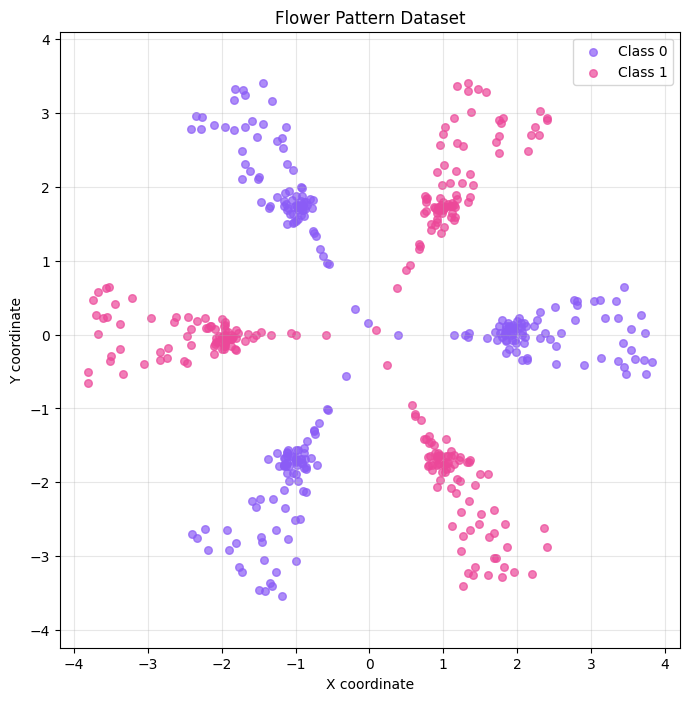

Dataset saved to neural-data.csv
Dataset shape: (500, 2)
Class distribution: [250 250]
Feature ranges: X=[-3.81, 3.82], Y=[-3.54, 3.40]

Example usage with sklearn:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_flower_dataset(n_samples=500, n_petals=8, noise=0.1, random_state=42):
    """
    Generate a flower-like dataset with alternating class labels in petals.
    
    Parameters:
    -----------
    n_samples : int, default=1000
        Number of data points to generate
    n_petals : int, default=8
        Number of petals in the flower
    noise : float, default=0.1
        Amount of noise to add to the data
    random_state : int, default=42
        Random seed for reproducibility
    
    Returns:
    --------
    X : numpy array of shape (n_samples, 2)
        Feature matrix with x, y coordinates
    y : numpy array of shape (n_samples,)
        Target labels (0 or 1)
    """
    
    np.random.seed(random_state)
    
    X = []
    labels = []
    
    # Points per petal
    points_per_petal = n_samples // n_petals
    center_points = n_samples - (points_per_petal * n_petals)
    
    # Generate petals
    for petal in range(n_petals):
        # Angle for this petal
        base_angle = 2 * np.pi * petal / n_petals
        
        # Alternating classes for adjacent petals
        class_label = petal % 2
        
        for i in range(points_per_petal):
            # Radius varies along the petal length
            t = i / points_per_petal
            
            # Create petal shape: starts narrow, gets wider, then narrow again
            radius = 0.5 + 2.5 * (np.sin(t * np.pi) ** 0.5) * (1 + 0.3 * np.cos(4 * t * np.pi))
            
            # Angular spread for petal width
            petal_width = 0.2 * np.sin(t * np.pi)
            angle = base_angle + np.random.uniform(-petal_width, petal_width)
            
            # Add some radial noise
            radius += np.random.normal(0, noise)
            angle += np.random.normal(0, noise * 0.1)
            
            # Convert to cartesian coordinates
            x_coord = radius * np.cos(angle)
            y_coord = radius * np.sin(angle)
            
            X.append([x_coord, y_coord])
            labels.append(class_label)
    
    # Add some points near the center
    for i in range(center_points):
        angle = np.random.uniform(0, 2 * np.pi)
        radius = np.random.uniform(0, 0.6)
        
        x_coord = radius * np.cos(angle) + np.random.normal(0, noise)
        y_coord = radius * np.sin(angle) + np.random.normal(0, noise)
        
        # Random class for center points
        class_label = np.random.randint(0, 2)
        
        X.append([x_coord, y_coord])
        labels.append(class_label)
    
    return np.round(np.array(X), 2), np.array(labels)

def plot_flower_dataset(X, y, title="Flower Pattern Dataset"):
    """Plot the flower dataset"""
    plt.figure(figsize=(8, 8))
    
    # Plot each class with different colors
    colors = ['#8B5CF6', '#EC4899']  # Purple and pink
    for class_label in [0, 1]:
        mask = y == class_label
        plt.scatter(X[mask, 0], X[mask, 1], 
                   c=colors[class_label], 
                   alpha=0.7, 
                   s=30,
                   label=f'Class {class_label}')
    
    plt.title(title)
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

def save_dataset(X, y, filename='neural-data.csv'):
    """Save the dataset to CSV file"""
    df = pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'label': y
    })
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")

# Generate the dataset
if __name__ == "__main__":
    # Generate flower dataset
    X, y = generate_flower_dataset(n_samples=500, n_petals=6, noise=0.1)
    
    # Plot the dataset
    plot_flower_dataset(X, y)
    
    # Save to CSV
    save_dataset(X, y)
    
    # Print dataset info
    print(f"Dataset shape: {X.shape}")
    print(f"Class distribution: {np.bincount(y)}")
    print(f"Feature ranges: X=[{X[:, 0].min():.2f}, {X[:, 0].max():.2f}], "
          f"Y=[{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")
    
    # Example usage with sklearn
    print("\nExample usage with sklearn:")
    print("from sklearn.model_selection import train_test_split")
    print("from sklearn.neural_network import MLPClassifier")
    print()
    print("X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)")
    print("clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)")
    print("clf.fit(X_train, y_train)")
    print("accuracy = clf.score(X_test, y_test)")